<a href="https://colab.research.google.com/github/KyleTy1er/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Day4_Assignment_of_LS_DS_114_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












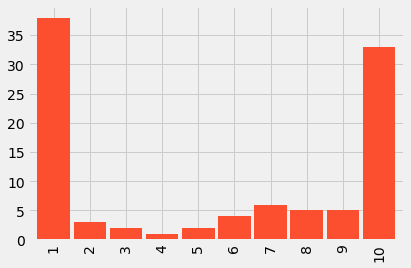

In [152]:
# Importing our modules, and our "fake data frame"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],      #These are the amounts held in the bars
                 index=range(1,11))                     #These are the indices for those amounts along the x axis

fake.plot.bar(color='C1', width=0.9)                    #this tells matplot lib to generate a bar plot with a certain color and bar width

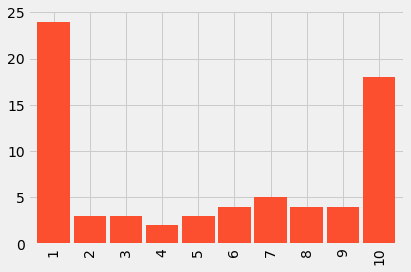

In [20]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

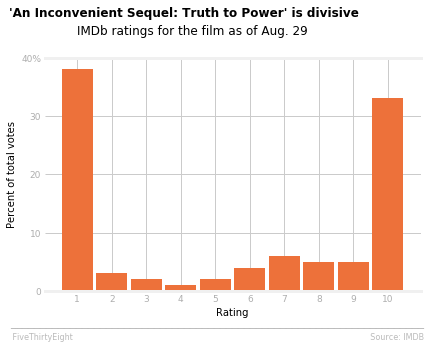

In [137]:

#setting style sheet for graphs

plt.style.use('fivethirtyeight')

#using fig axes syntax from here on

#creating fig and ax variables

fig, ax = plt.subplots()

#This is referencing the height of the variable "fake", and building x axis according to the x = parameter

ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=0.9)  

#Setting figure background color

fig.set_facecolor(color='none')

#Setting axes background color

ax.set_facecolor(color='none')

#To fix the grid must fix the "tick marks"

#Setting X ticks

ax.set_xticks(range(1,11,1))

#Setting y ticks

ax.set_yticks(range(0,50,10))

#Setting y tick labels

ax.set_yticklabels([0,10,20,30,'40%'], fontsize=9, color="#AEAEAE")

#Setting x tick labels

ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10], fontsize=9, color='#AEAEAE')

#Remove left spine

ax.spines['left'].set_visible(False)

#Remove right spine

ax.spines['right'].set_visible(False)

#Adding x label

ax.set_xlabel("Rating", fontsize=10, fontweight=500)

#Adding y label

ax.set_ylabel("Percent of total votes", fontsize=10, fontweight=500)

#Set Title

ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, x=.37, y=1.15, fontweight='bold')

# Subtitle (using the text method and not subtitle on purpose)

ax.text(s="IMDb ratings for the film as of Aug. 29", y=44, x=1, fontsize=12)

#Attempt to put in the line FiveThirtyEight graphic 

fig.text(s='_____________________________________________________________________', y=-0.05, x=0, fontsize=12, color='#BBBBBB')


fig.text(s=' FiveThirtyEight                                                                                                                       Source: IMDB', y=-0.1, x=0, fontsize=8, color='#BBBBBB')


# Show the graph, squelch the return output
plt.show()







In [38]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [60]:
#Reading in "How Baby Boomers Get High"

drug_db = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')
drug_db.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [139]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575'
example = Image(url=url, width=400)


display(example)



In [174]:
#So from the example and the readme the data I need is 

#The "Use" column of each of these drugs for the age range of 50-64

#Going to attempt to create a subset that only contains the relevant data in the graph
drug_db_subset = drug_db[['age', 'marijuana-use', 'pain-releiver-use', 'tranquilizer-use', 
                         'cocaine-use', 'crack-use', 'oxycontin-use', 'stimulant-use', 
                         'hallucinogen-use', 'sedative-use', 'inhalant-use', 'meth-use', 
                         'heroin-use']]

#Going to attempt to create a condition that will limit my results only to the age range 50-64

condition = drug_db_subset['age'] == '50-64'

drug_db_subset = drug_db_subset[condition]

drug_db_subset.head()

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [159]:
#Now going to start building the horizontal bar chart...



TypeError: ignored

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here